In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df1 = pd.read_csv('cleaned_wikidata22.csv')

languages = list(df1.columns)
languages.remove('Month')

df=df1['Python']

In [3]:
model = pm.auto_arima(df, seasonal=False, stepwise=True, trace=True)

print(f"Best p: {model.order[0]}")
print(f"Best d: {model.order[1]}")
print(f"Best q: {model.order[2]}")

p = model.order[0]
d = model.order[1]
q = model.order[2]

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2118.469, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2122.798, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2115.625, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2115.669, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2120.804, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2117.538, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2117.491, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2119.435, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2113.629, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2115.541, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2115.494, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2113.673, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2117.439, Time=0.14 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.754 seconds
Best p: 1
Best d: 1
Be

In [4]:
df = df.dropna()
df = df.astype(float)

arima_model = ARIMA(df, order=(p,d,q))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                 Python   No. Observations:                  112
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1054.814
Date:                Sun, 10 Nov 2024   AIC                           2113.629
Time:                        22:37:12   BIC                           2119.048
Sample:                             0   HQIC                          2115.827
                                - 112                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2814      0.059     -4.771      0.000      -0.397      -0.166
sigma2       1.06e+07   4.91e+05     21.580      0.000    9.64e+06    1.16e+07
Ljung-Box (L1) (Q):                   0.01   Jarque-

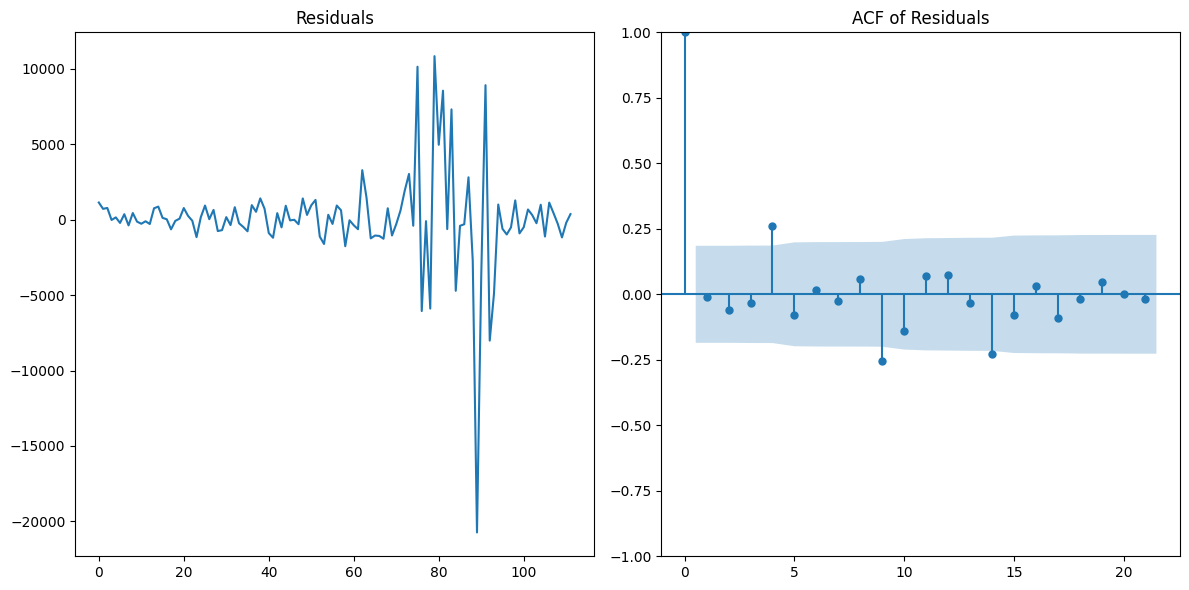

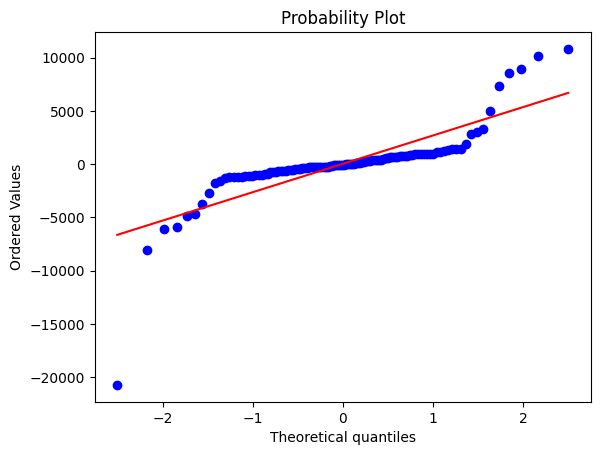

In [5]:
residuals = model.resid
plt.figure(figsize=(12, 6))

# Residual plot
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals')

# ACF of residuals
plt.subplot(1, 2, 2)
plot_acf(residuals, ax=plt.gca())
plt.title('ACF of Residuals')

plt.tight_layout()
plt.show()

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


In [6]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

arima_model = ARIMA(train, order=(1,1,1))
model = arima_model.fit()

forecast = model.forecast(steps=len(test))

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


MAE: 22292.804602967994, MSE: 504040384.89160115, RMSE: 22450.84374565021


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


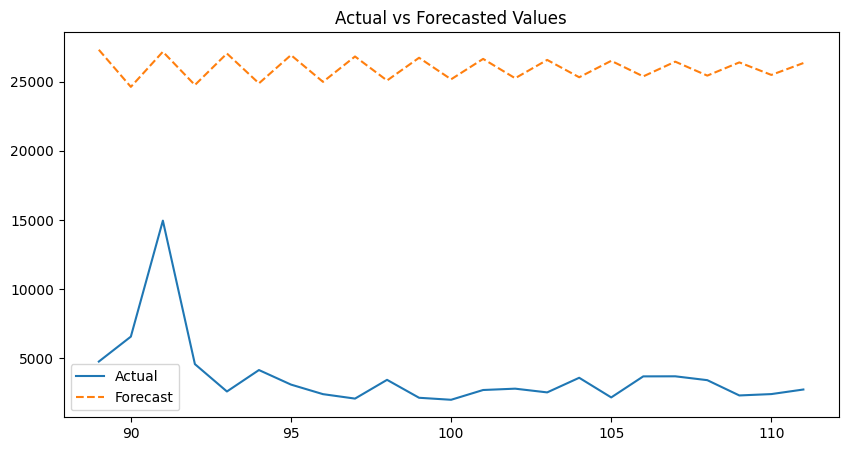

In [7]:
# Plotting actual vs. forecasted values
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("Actual vs Forecasted Values")
plt.show()


In [8]:
di = {}
di['language']=[]
di['mae'] = []
di['mse'] = []
di['rmse'] = []


for language in languages:
    df = df1[language]

    model = pm.auto_arima(df, seasonal=False, stepwise=True, trace=True)
    p = model.order[0]
    d = model.order[1]
    q = model.order[2]

    arima_model = ARIMA(df, order=(p,d,q))
    model = arima_model.fit()

    train_size = int(len(df) * 0.8)
    train, test = df[:train_size], df[train_size:]

    arima_model = ARIMA(train, order=(p,d,q))
    model = arima_model.fit()

    forecast = model.forecast(steps=len(test))

    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    print(f'Language: {language}')
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
    print()

    di['language'].append(language)
    di['mae'].append(mae)
    di['mse'].append(mse)
    di['rmse'].append(rmse)

df_res = pd.DataFrame.from_dict(di)
df_res.to_csv('result_arima.csv',index=False)

    

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1436.563, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1437.523, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1436.637, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1434.563, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1420.531, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1417.199, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1436.433, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1413.382, Time=0.74 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1424.148, Time=0.33 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1415.374, Time=0.74 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1411.523, Time=1.03 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1402.5

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Language: PostgreSQL
MAE: 93.05562184403057, MSE: 11679.559186310518, RMSE: 108.07200926377985

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1667.712, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1661.528, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1661.112, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1665.722, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1660.653, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1661.605, Time=0.83 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1657.000, Time=0.39 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1656.616, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1659.178, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Usin

Language: Ruby
MAE: 981.3722870810427, MSE: 1035844.1615597891, RMSE: 1017.7642956794019

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.82 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1579.212, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1448.261, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1497.485, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1447.080, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1447.131, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1448.439, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1446.449, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1448.359, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1466.477, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1432.313, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1444.314, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1438.188, Time=0.02 sec
 ARIMA(2,0,1)(

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Language: MariaDB
MAE: 126.54798706539, MSE: 54157.16112727149, RMSE: 232.71691199238504

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1059.704, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1055.663, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1055.016, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1057.757, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1056.224, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1056.819, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1053.105, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1054.386, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1054.921, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1053.737, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1054.794, Time=0.26 sec

Best model:  ARIMA

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Language: R
MAE: 628.4720926226241, MSE: 652957.882862407, RMSE: 808.0580937422798

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1590.516, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1569.204, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1565.703, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1588.517, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1566.755, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1565.962, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1563.703, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1564.755, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1563.962, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1567.204, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec

Best model:  ARIMA(0,1,1)(0,0

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Language: MATLAB
MAE: 176.7137229588249, MSE: 45182.38795990609, RMSE: 212.56149218498183

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1315.638, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1294.405, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1277.851, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1313.678, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1278.955, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1279.069, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1277.206, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1278.811, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1278.831, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1292.540, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1280.754, Time=1.34 sec

Best model:  ARIM

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Language: Bash
MAE: 12.260874389775557, MSE: 761.0435965674494, RMSE: 27.58701862411829

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1665.688, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1686.044, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1686.911, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1685.435, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1684.047, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1665.898, Time=0.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1665.392, Time=0.94 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1669.165, Time=0.64 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1681.595, Time=0.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1666.560, Time=1.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1681.608, Time=1.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1648.695, Time=1.75 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.73 sec
 ARIMA(3,1,3)(0

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Language: Delphi
MAE: 94.55055400710107, MSE: 13631.457553815664, RMSE: 116.75383314399431

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1770.302, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1738.998, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1708.403, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1768.304, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1710.291, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1710.308, Time=1.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1707.068, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1709.042, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1709.045, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1737.000, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.52 sec

Best model:  ARIMA(0,

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Language: SAS
MAE: 42.86875609229982, MSE: 3921.303202720621, RMSE: 62.62030982613086

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1676.022, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1671.403, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1665.929, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1674.024, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1657.658, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1659.621, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1659.627, Time=0.90 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1660.108, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1672.061, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1656.517, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1663.974, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1669.415, Time=0.08 sec
 ARIMA(2,1,1)(0,0

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Language: SPSS
MAE: 395.10794254788334, MSE: 262769.8547764684, RMSE: 512.6108219463069

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1343.101, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1107.108, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1249.433, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1098.626, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1095.173, Time=0.11 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1092.967, Time=0.56 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1093.263, Time=0.90 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=1.19 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=1095.262, Time=0.35 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1076.689, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1074.856, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] i

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Language: Java
MAE: 649.9046327695305, MSE: 651047.251116269, RMSE: 806.8749910093069

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1355.894, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1351.062, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1349.777, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1353.895, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1349.882, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1350.871, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1351.723, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1347.777, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1347.883, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1348.871, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1349.062, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1349.723, Time=0.31 sec

Best model:  ARI